# AIN212 Course Project 

Name-Surname : Emre Çoban ID : 2200765028 AIN212 Course Project Dataset : Generated power from solar energy

In [22]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# Data Reading , Cleaning , Preprocessing

In [23]:
url = "https://drive.google.com/file/d/16XKJpGVbDFO-hc3dJJrsmVIWPwA_QToZ/view?usp=sharing"
url = "https://drive.google.com/uc?id="+url.split("/")[-2]

In [24]:
df = pd.read_csv(url)
print("Number of rows = ",len(df),"\nNumber of Columns = ",len(df.columns),"\n\n")
df.head()

Number of rows =  4213 
Number of Columns =  21 




,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [25]:
df.tail(5)  ##Last 5 records

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


### checking columns and their types since there is no object type data no need to encode 

In [26]:
df.dtypes  

temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd        int64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay          int64
medium_cloud_cover_mid_cld_lay         int64
low_cloud_cover_low_cld_lay            int64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtype: object

### there is no nan values no need to drop any 

In [27]:
df.isnull().sum().sort_values(ascending =False) 

temperature_2_m_above_gnd            0
wind_direction_10_m_above_gnd        0
azimuth                              0
zenith                               0
angle_of_incidence                   0
wind_gust_10_m_above_gnd             0
wind_direction_900_mb                0
wind_speed_900_mb                    0
wind_direction_80_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_speed_10_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
shortwave_radiation_backwards_sfc    0
low_cloud_cover_low_cld_lay          0
medium_cloud_cover_mid_cld_lay       0
high_cloud_cover_high_cld_lay        0
total_cloud_cover_sfc                0
snowfall_amount_sfc                  0
total_precipitation_sfc              0
mean_sea_level_pressure_MSL          0
generated_power_kw                   0
dtype: int64

### Dropping duplicates if there is any

In [28]:
df.drop_duplicates(inplace=True) 

In [29]:
print("Number of rows = ",len(df),"\nNumber of Columns = ",len(df.columns),"\n\n")  ##no duplicates exists

Number of rows =  4213 
Number of Columns =  21 




### Relationship between features

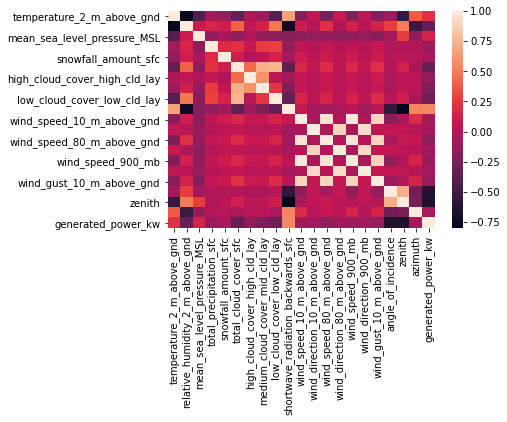

In [30]:
## corr map too see relationship between variables
sns.heatmap(df.corr());

array([[<AxesSubplot:title={'center':'temperature_2_m_above_gnd'}>,
        <AxesSubplot:title={'center':'relative_humidity_2_m_above_gnd'}>,
        <AxesSubplot:title={'center':'mean_sea_level_pressure_MSL'}>,
        <AxesSubplot:title={'center':'total_precipitation_sfc'}>,
        <AxesSubplot:title={'center':'snowfall_amount_sfc'}>],
       [<AxesSubplot:title={'center':'total_cloud_cover_sfc'}>,
        <AxesSubplot:title={'center':'high_cloud_cover_high_cld_lay'}>,
        <AxesSubplot:title={'center':'medium_cloud_cover_mid_cld_lay'}>,
        <AxesSubplot:title={'center':'low_cloud_cover_low_cld_lay'}>,
        <AxesSubplot:title={'center':'shortwave_radiation_backwards_sfc'}>],
       [<AxesSubplot:title={'center':'wind_speed_10_m_above_gnd'}>,
        <AxesSubplot:title={'center':'wind_direction_10_m_above_gnd'}>,
        <AxesSubplot:title={'center':'wind_speed_80_m_above_gnd'}>,
        <AxesSubplot:title={'center':'wind_direction_80_m_above_gnd'}>,
        <AxesSubplot:ti

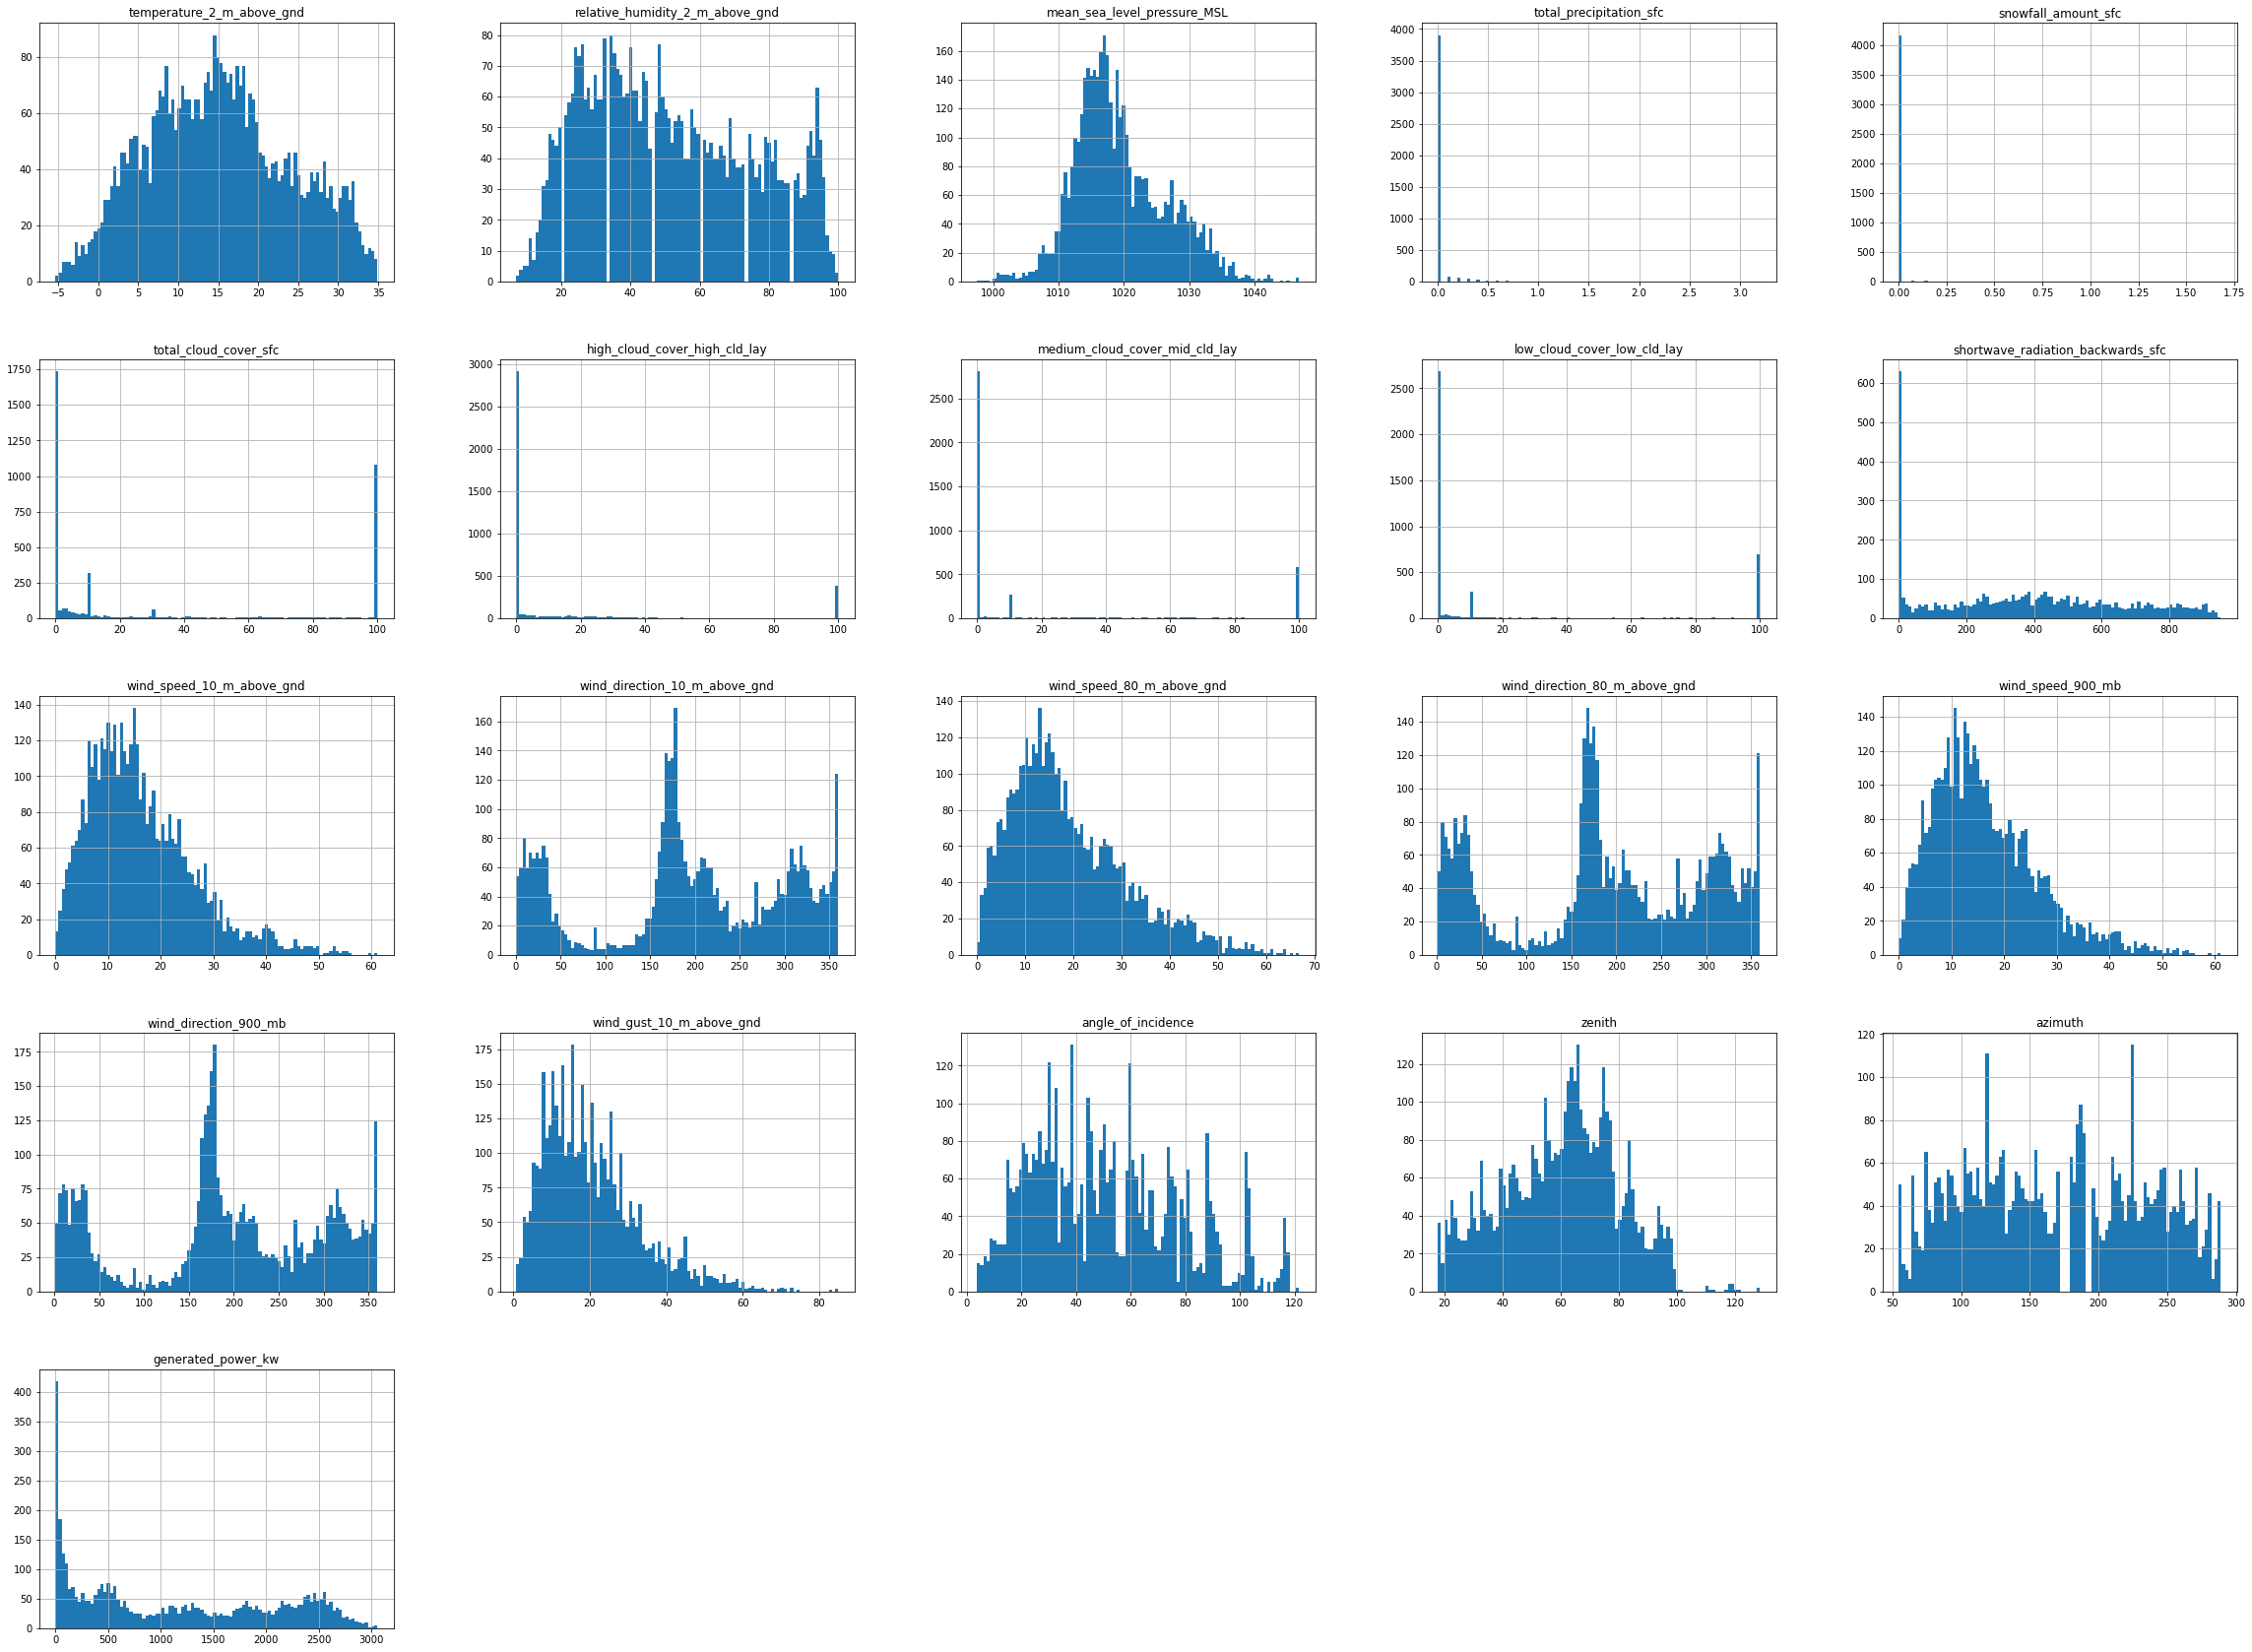

In [31]:
df.hist(bins=100,figsize=(40,30))  ##some histograms to see relationship between them

### Report for this Chapter

After I imported the dataset I tried to clean the data and reprocess. I checked null values , duplicates , meaningless values , data types etc. But my dataset had no object type data so I did not use encoding and it had no missing values either.

## Scaling data 

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
new_df = pd.DataFrame(df,columns=df.columns)

In [34]:
new_df.head()  ##scaled data

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,0.186832,0.258065,0.760649,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.868442,0.139952,0.059909,0.108329,0.937639,0.282051,0.466555,0.591842,0.315156,0.148554
1,0.190311,0.215054,0.762677,0.0,0.0,0.0,0.0,0.0,0.0,0.001869,...,0.818561,0.089563,0.088107,0.075438,0.892276,0.252137,0.353351,0.518715,0.363394,0.461922
2,0.223602,0.279570,0.768763,0.0,0.0,0.0,0.0,0.0,0.0,0.114019,...,0.749624,0.058164,0.153784,0.061528,0.795753,0.158120,0.246800,0.461595,0.418291,0.724566
3,0.277516,0.247312,0.768763,0.0,0.0,0.0,0.0,0.0,0.0,0.271028,...,0.897429,0.053080,0.063642,0.050401,0.942711,0.226496,0.160705,0.426026,0.479500,0.826882
4,0.324969,0.215054,0.748479,0.0,0.0,0.0,0.0,0.0,0.0,0.394393,...,0.026345,0.101077,0.067098,0.108329,0.059240,0.188034,0.131019,0.416193,0.544417,0.863716


In [35]:
new_df.describe()  ##to see specific infos

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,0.507282,0.477000,0.442958,0.009925,0.001671,0.340570,0.144588,0.200235,0.213734,0.407182,...,0.541196,0.283769,0.529555,0.267766,0.533125,0.235796,0.399406,0.381734,0.489157,0.371090
std,0.219967,0.252966,0.142452,0.053191,0.022628,0.428436,0.307117,0.363879,0.380139,0.292407,...,0.296630,0.179425,0.303054,0.161763,0.296802,0.150153,0.225983,0.179403,0.275150,0.306844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.341366,0.268817,0.344828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149533,...,0.424665,0.151615,0.359786,0.150221,0.409886,0.123932,0.217617,0.249024,0.254649,0.075798
50%,0.499379,0.440860,0.417850,0.000000,0.000000,0.087000,0.000000,0.000000,0.000000,0.400935,...,0.531992,0.242823,0.520090,0.237113,0.520703,0.205128,0.369698,0.401263,0.463904,0.317863
75%,0.661863,0.677419,0.529412,0.000000,0.000000,1.000000,0.090000,0.100000,0.100000,0.629907,...,0.811022,0.390849,0.810633,0.359516,0.799376,0.311966,0.555156,0.511520,0.727444,0.661139
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Cluster Analysis

In [36]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

### KNN Clustering

## Elbow method 

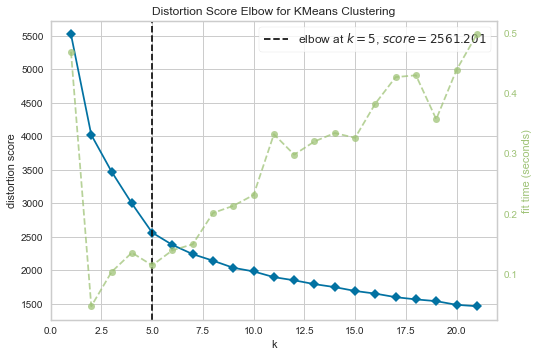

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
visualizer = KElbowVisualizer(KMeans(),k=(1,22))
visualizer.fit(new_df.iloc[:,0:20])
visualizer.poof()

In [38]:
km = KMeans(n_clusters = 5)
km.fit(new_df.iloc[:,0:20])

KMeans(n_clusters=5)

In [39]:
km.labels_  


array([2, 2, 2, ..., 1, 3, 1])

## Visualizing Clusters

In [40]:
from sklearn.decomposition import PCA 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

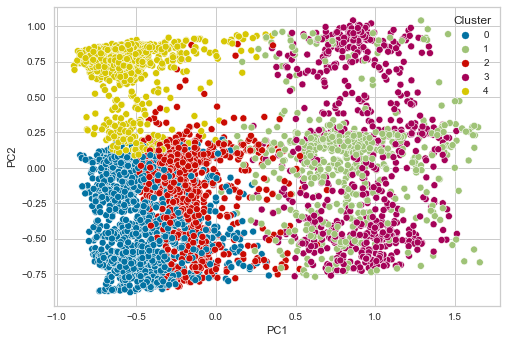

In [41]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(new_df.iloc[:,0:20]),columns=['PC1','PC2']) 
pca_data['Cluster'] = pd.Categorical(km.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="Cluster",data=pca_data) 

### Report for this chapter

I scaled the data and created a new dataframe from scaled data. And I used elbow visualizer to pick a good number for k then I used KNN clustering and visualized it using PCA.

# Predictive Modeling

## Going to predict generated power by given values

## Split Data

In [42]:
x = df.iloc[:,0:20]  ##Going to predict generated power
y = df.iloc[:,20:]


In [43]:
y

,generated_power_kw
0,0.148554
1,0.461922
2,0.724566
3,0.826882
4,0.863716
...,...
4208,0.056729
4209,0.132096
4210,0.051808
4211,0.041531


In [44]:
x

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth
0,0.186832,0.258065,0.760649,0.00000,0.0,0.0,0.00,0.00,0.0,0.000000,0.104119,0.868442,0.139952,0.059909,0.108329,0.937639,0.282051,0.466555,0.591842,0.315156
1,0.190311,0.215054,0.762677,0.00000,0.0,0.0,0.00,0.00,0.0,0.001869,0.084178,0.818561,0.089563,0.088107,0.075438,0.892276,0.252137,0.353351,0.518715,0.363394
2,0.223602,0.279570,0.768763,0.00000,0.0,0.0,0.00,0.00,0.0,0.114019,0.076496,0.749624,0.058164,0.153784,0.061528,0.795753,0.158120,0.246800,0.461595,0.418291
3,0.277516,0.247312,0.768763,0.00000,0.0,0.0,0.00,0.00,0.0,0.271028,0.058843,0.897429,0.053080,0.063642,0.050401,0.942711,0.226496,0.160705,0.426026,0.479500
4,0.324969,0.215054,0.748479,0.00000,0.0,0.0,0.00,0.00,0.0,0.394393,0.101504,0.026345,0.101077,0.067098,0.108329,0.059240,0.188034,0.131019,0.416193,0.544417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0.348820,0.634409,0.559838,0.00000,0.0,1.0,1.00,1.00,1.0,0.270093,0.354037,0.792522,0.381280,0.785611,0.392898,0.785416,0.290598,0.160718,0.426645,0.480209
4209,0.320994,0.892473,0.580122,0.00000,0.0,1.0,0.79,1.00,1.0,0.220561,0.195652,0.017721,0.194378,0.010143,0.189985,0.016747,0.115385,0.131932,0.417096,0.545044
4210,0.313540,0.892473,0.584178,0.03125,0.0,1.0,0.73,1.00,1.0,0.119626,0.147270,0.004868,0.130233,0.980133,0.130093,0.985538,0.256410,0.182339,0.434550,0.609204
4211,0.337888,0.795699,0.567951,0.00000,0.0,1.0,0.74,0.66,1.0,0.196262,0.119974,0.029962,0.094049,0.033772,0.097202,0.036001,0.175214,0.276601,0.476734,0.668700


# Creating Predictive Model

In [45]:
from  sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor  as KNN
from sklearn.metrics import mean_squared_error  as mse

In [46]:
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=21,shuffle=True)


## Tuning parameters for KNN model

In [47]:
from sklearn.model_selection import GridSearchCV

### Tuning model using Cross validation

In [48]:
knn_params = {'n_neighbors':np.arange(1,30,1)}
knn = KNN()
knn_cv = GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [49]:
knn_cv.best_params_  ##it found 6 perfect

{'n_neighbors': 6}

In [50]:
optimal_knn = KNN(n_neighbors = knn_cv.best_params_["n_neighbors"])
optimal_knn.fit(X_train,y_train)
print("Score of Knn model : ",optimal_knn.score(X_test,y_test))
predicts = optimal_knn.predict(X_test)
print("Mse error for predictions = ",mse(y_test,predicts))


Score of Knn model :  0.7491003765848054
Mse error for predictions =  0.023069038092479


In [51]:
## Comparing predicted values and true values in a dataframe

compare = pd.DataFrame(data=y_test.values,columns=["True Values"])
compare["Predicted Values"] = predicts
compare.head()

,True Values,Predicted Values
0,0.687782,0.685126
1,0.005149,0.039591
2,0.026822,0.079891
3,0.000583,0.003638
4,0.608013,0.235249


## Plotting true values vs predicted values

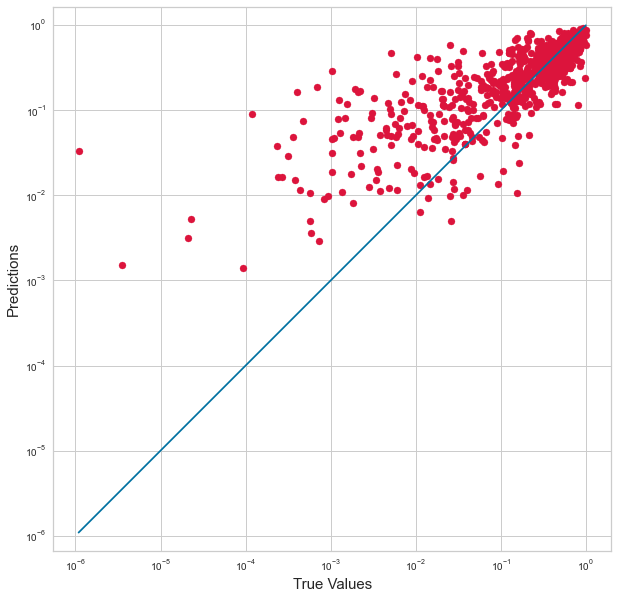

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(y_test.values, predicts, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicts), max(y_test.values))
p2 = min(min(predicts), min(y_test.values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Report for this chapter

When i examined dataset for the first time first thing i saw is generated power column. It was obivious that i can use that as y 
and the others as x so i decided to use regression model since generated power is a continuous value.
I picked KNN regression but i might have picked linear regression too. Then i used gridsearchcv to tune knn parameters and i found best n_neighbours attribute.Then I predicted some values from X_test and compared them with original values y_test using dataframe and plotting.